# Non-AI Based Scenario

## Customized gymnasium environment: `smart-city`

Below, are some configurations for setting up a simulation environment for a mobile communication scenario in a smart city context using the Gymnasium library. It involves some basic imports, steps for registering the custom environment and creating a new instance of that environment.

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity
from gymnasium.envs.registration import register

# easy access to the default configuration
#MComSmartCity.default_config()

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',  # Adjust this if the entry point is different
    kwargs={'config': {}, 'render_mode': None}
)

# List all registered environments
env_specs = gym.envs.registry.keys()
print(env_specs)

# Verify your specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

import gymnasium
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\envs\registration.py:694: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_USERS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_USERS` for environment variables or `env.get_wrapper_attr('NUM_USERS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_SENSORS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_SENSORS` for environment variables or `env.get_wrapper_attr('NUM_

The rendered environment shows the 1 base station as a cell tower with circles indicating their range.

There are 10 stationary sensors shown as blue.

The 5 moving users are shown as small circles, where the number indicates the user ID and
the color represents the user's current QoE (red = bad, yellow = ok, green = good).

A line between a user and a cell indicates that the user is connected to the cell.
Again, the line color indicates the QoE that's achieved via the connection.


Users and sensors are always connected to the cell and they get a connection and a data rate to transmit data.

Here, with random action, 

## Parameters

Here are the important parameters used in the simulation environment:

5G Base Station Bandwidth:

- Low-band bandwidth: 5-20 MHz per channel
- Mid-band bandwidth: 40-100 MHz per channel
- High-bandwidth: 100-800 MHz per channel

Real-World 5G Data Rates in Urban Areas:

- Typical 5G Download Speeds in Urban Areas:
    - Mid-band: 150 Mbps to 500 Mbps. (18.75 MB to 62.5 MB)
    - High-band: 1 Gbps to 3 Gbps. (125 MB to 375 MB)

- Typical 5G Upload Speeds in Urban Areas:
    - Mid-band: 30 Mbps to 100 Mbps. (3.75 MB to 12.5 MB)
    - High-band: 100 Mbps to 500 Mbps. (12.5 MB to 62.5 MB)

Smart City Environment:
- User Equipment Average Data Rate Request: 23 Mbps (around 2.875 MB)
- Sensors Average Data Rate Request: 9 Mbps (around 1.125 MB)


2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for UE: 0 connected to BS: 0 is : 16.650952687774165 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for UE: 1 connected to BS: 0 is : 2.054064647605532 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for UE: 2 connected to BS: 0 is : 1.5109858190968302 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for UE: 3 connected to BS: 0 is : 3.51931721692693 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for UE: 4 connected to BS: 0 is : 7.157453242750151 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 0 connected to BS: 0 is : 308.3719121642798 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 1 connected to BS: 0 is : 35.03896003384405 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 2 connected to BS: 0 is : 17.28451442094306 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 3 connected to BS: 0 is : 28.279792019732454 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 4 connected to BS: 0 is : 49.77896182762014 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 5 connected to BS: 0 is : 12.416370567005558 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 6 connected to BS: 0 is : 9.793755919339969 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 7 connected to BS: 0 is : 121.64070171132076 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 8 connected to BS: 0 is : 95.84526098864777 MB

2024-09-03 00:30:23,779 - INFO - Time step: 0.0 Data transfer rate for Sensor: 9 connected to BS: 0 is : 14.735923159048195 MB

Action (0.35, 0.35) completed.
Reward for episode: 601.0374695171765


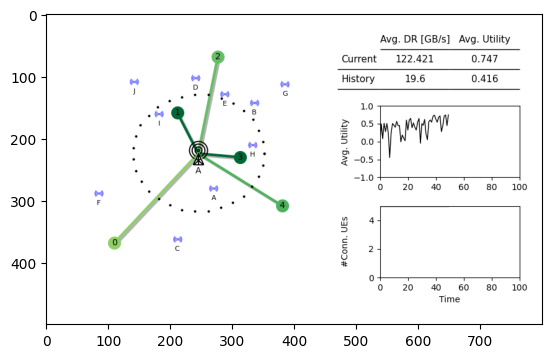

In [2]:
from IPython import display

# run the simulation for 10 time steps
done = False
obs, info = env.reset()

total_reward = 0
action = (0.35, 0.35)
rewards = []

for _ in range(50):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)
    total_reward += reward

    # Store the reward at this time step
    rewards.append(reward)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

print(f"Action {action} completed.")
print(f"Reward for episode: {total_reward}")

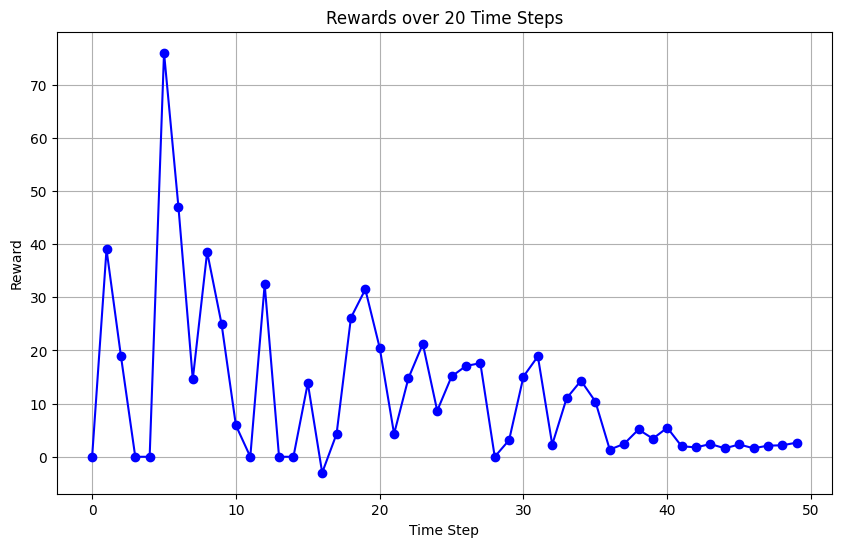

In [3]:
# Plot the rewards over time steps
plt.figure(figsize=(10, 6))
plt.plot(range(len(rewards)), rewards, marker='o', color='b')
plt.title("Rewards over 20 Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

Below, we see the how the queue sizes evolve over time in devices, sensors and also base stations.

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.plot_queue_sizes to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_queue_sizes` for environment variables or `env.get_wrapper_attr('plot_queue_sizes')` that will search the reminding wrappers.
  logger.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (51,) + inhomogeneous part.

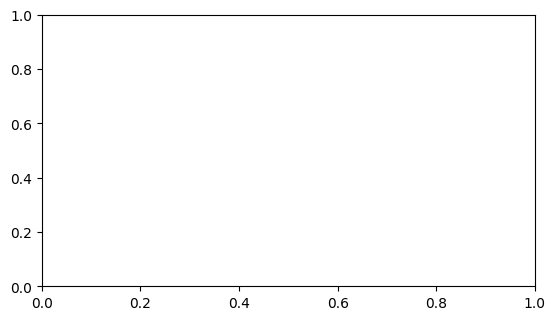

In [4]:
env.plot_queue_sizes()

Below we see the number of packets from devices and sensors over time.

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.plot_delayed_packets to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_delayed_packets` for environment variables or `env.get_wrapper_attr('plot_delayed_packets')` that will search the reminding wrappers.
  logger.warn(


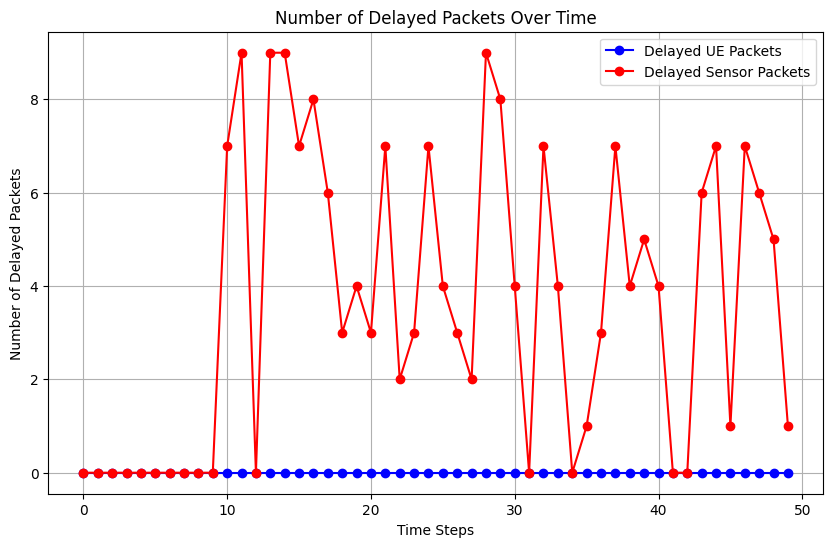

In [5]:
env.plot_delayed_packets()

Below we see how much computation and communication resources are allocated for devices and senors at each time step.

In [ ]:
env.plot_resource_allocations()